In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import re
from qbstyles import mpl_style
from matplotlib import dates as mdates
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from numpy.random import RandomState
import random

In [4]:
discharge = pd.read_excel('Cardiac_Outcomes.xlsx','Hospitalization_Discharge')
complications = pd.read_excel('Cardiac_Outcomes.xlsx',"CardiacComplications")
responsivenes = pd.read_excel('Cardiac_Outcomes.xlsx',"Responsivenes")
labs = pd.read_excel('Cardiac_Outcomes.xlsx','Labs')
history = pd.read_excel('Cardiac_Outcomes.xlsx',"PatientHistory")
demo =pd.read_excel('Cardiac_Outcomes.xlsx',"Demography")
prescriptions=pd.read_excel('Cardiac_Outcomes.xlsx',"Patient_Precriptions")

#Q1: On average, what is the least frequent weekday of admission?

In [4]:
#import pd
#discharge = pd.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
admitDate = pd.DataFrame(discharge['Admission_date'])
admitDate['Admission_date'] = pd.to_datetime(admitDate['Admission_date']) 
admitDate['dayOfWeek'] = admitDate['Admission_date'].dt.day_name() 
grouping = admitDate.groupby(["dayOfWeek"])["dayOfWeek"].count()
leastFrequentDay = grouping.sort_values(axis = 0, ascending = True).head(1) 
print("Least admissions happened on",leastFrequentDay.idxmax())

Least admissions happened on Tuesday


In [ ]:
# Q2: what % of the admissions happened on weekends? this can help staffing schedules, resource management etc

In [94]:
#import pd
#discharge = pd.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
admitDate = pd.DataFrame(discharge['Admission_date'])
admitDate['Admission_date'] = pd.to_datetime(admitDate['Admission_date']) 
admitDate['dayOfWeek'] = admitDate['Admission_date'].dt.day_name() 
grouping = admitDate.groupby(["dayOfWeek"])["dayOfWeek"].count()
v1 = 0
for i, v in grouping.items():
   # print('index: ', i, 'value: ', v)
    if ((i == 'Sunday') or (i == 'Saturday')):
        v1 = v + v1
percent =(v1/grouping.sum())*100
print("percent of patients admitted during weekends: ", round(percent, 1), "%")


percent of patients admitted during weekends:  28.6 %


In [85]:
#Q3: Which year had the minimum admissions?

In [52]:
#import pd
#discharge = pd.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge") 
admitDate = pd.DataFrame(discharge['Admission_date']) 
admitDate['Admission_date'] = pd.to_datetime(admitDate['Admission_date']) 
admitDate['year'] = pd.DatetimeIndex(admitDate['Admission_date']).year
grouping = admitDate.groupby(['year'])['year'].value_counts()
print("Minimum admissions happened in the year",grouping.idxmin())

Minimum admissions happened in the year 2017


In [ ]:
#Q4: Count of patient's discharge destination by admission ward

In [100]:

#discharge = pd.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
countfreequencydischageUnique=discharge[["admission_ward", "DestinationDischarge"]].value_counts()
countfreequencydischageUnique


admission_ward  DestinationDischarge
Cardiology      Home                    1101
                HealthcareFacility       296
                Unknown                  139
Others          Home                     119
GeneralWard     Home                     116
                HealthcareFacility       103
                Unknown                   44
Others          HealthcareFacility        38
                Unknown                   24
Cardiology      Died                      11
ICU             Home                       8
                Unknown                    5
GeneralWard     Died                       2
ICU             Died                       1
                HealthcareFacility         1
Name: count, dtype: int64

In [97]:
#Q5; Find the number of patients admitted in cardiology has discharged from icu and who are those?

In [117]:
df = discharge.loc[(discharge["admission_ward"]=='Cardiology') & (discharge["discharge_department"]=='ICU')]
x = df.shape[0]
print("The number of patients admitted in cardiology who got discharged from icu is ", x)
print("They are:")
df["inpatient_number"].reset_index()




The number of patients admitted in cardiology who got discharged from icu is  6
They are:
43      798240
89      773090
393     760663
749     824103
797     732466
1425    870258
Name: inpatient_number, dtype: int64


#Q6: Number of patients with  severe comorbid conditions based on CCI Scores 
another way of asking the same question: Number of patients with high risk of mortality?
The total score of the CCI consists in a simple sum of the weights, 
with higher scores indicating not only a greater mortality risk but also more severe comorbid conditions

In [118]:
history.loc[(history["CCI_score"]>=5)].shape[0]

16

In [ ]:
#Q7.Which patients are at high risk of mortality (based on NYHA score) got discharged from Cardiology and were descesed?
NYHA_cardiac_function_classification

In [140]:
df_one = complications.loc[(complications["NYHA_cardiac_function_classification"]==4)]['inpatient_number']
df_two = discharge.loc[(discharge["discharge_department"]=='Cardiology') & (discharge["outcome_during_hospitalization"]=='Dead')]['inpatient_number']
set(df_one).intersection(set(df_two))


{750447, 765343, 805475, 828678, 854580, 869467}

In [ ]:
 #Q8: Based on their age find out the type of heart failure 

In [149]:
df_three = pd.DataFrame({
    'inpatient_number':complications['inpatient_number'],
    'type_of_heart_failure':complications['type_of_heart_failure'],
    'ageCat':demo['ageCat']
})
#results = df_three(["ageCat","type_of_heart_failure"]).value_counts()
#results
grouping = df_three.groupby(["ageCat","type_of_heart_failure"])["type_of_heart_failure"].count()
grouping.sort_values(ascending=False)

ageCat  type_of_heart_failure
69-79   Both                     532
79-89   Both                     486
59-69   Both                     269
69-79   Left                     163
79-89   Left                     146
59-69   Left                      90
49-59   Both                      79
89-110  Both                      67
39-49   Both                      38
89-110  Left                      33
49-59   Left                      22
69-79   Right                     20
39-49   Left                      17
79-89   Right                     14
59-69   Right                      9
29-39   Both                       6
        Left                       5
49-59   Right                      5
21-29   Both                       3
        Left                       1
39-49   Right                      1
29-39   Right                      1
89-110  Right                      1
Name: type_of_heart_failure, dtype: int64

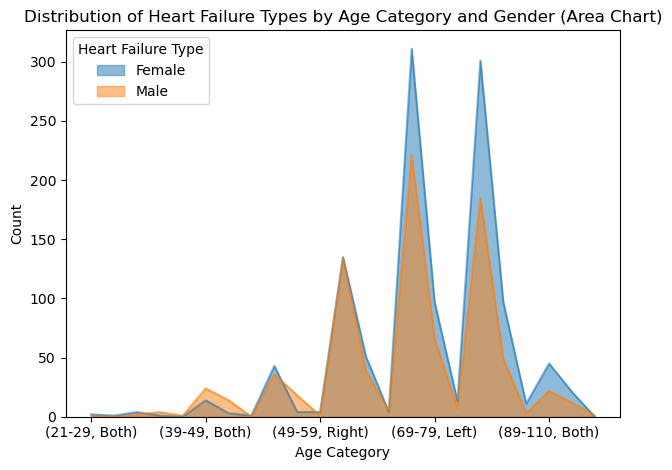

In [5]:
df = pd.concat([demo, complications], axis=1, join='inner') 

counts =df.groupby(['ageCat', 'type_of_heart_failure', 'gender']).size().unstack(fill_value=0)
counts.plot(kind='area', stacked=False)  
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Heart Failure Types by Age Category and Gender (Area Chart)')
plt.legend(title= 'Heart Failure Type')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()